<a href="https://colab.research.google.com/github/tlavette/assignment1/blob/main/advancedColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tonja Jean
9/8/2024

In [ ]:
# wget to download
!wget https://git.ligo.org/gwosc/tutorials/gwosc-aux-tutorials/-/tree/main/Channels/03_bulk_aux_channel_list.csv


--2024-09-08 22:49:31--  https://git.ligo.org/gwosc/tutorials/gwosc-aux-tutorials/-/tree/main/Channels/03_bulk_aux_channel_list.csv
Resolving git.ligo.org (git.ligo.org)... 129.89.61.97
Connecting to git.ligo.org (git.ligo.org)|129.89.61.97|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://git.ligo.org/gwosc/tutorials/gwosc-aux-tutorials/-/tree/main [following]
--2024-09-08 22:49:31--  https://git.ligo.org/gwosc/tutorials/gwosc-aux-tutorials/-/tree/main
Reusing existing connection to git.ligo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 46434 (45K) [text/html]
Saving to: ‘03_bulk_aux_channel_list.csv’

03_bulk_aux_channel 100%[===================>]  45.35K  --.-KB/s    in 0.01s   

2024-09-08 22:49:31 (3.13 MB/s) - ‘03_bulk_aux_channel_list.csv’ saved [46434/46434]



**Use WGET to download a file**

In [ ]:
# authenticate (another one)
from google.colab import auth
auth.authenticate_user()


In [ ]:
import requests, os
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

try:
    from gwpy.timeseries import TimeSeries
except:
    ! pip install -q "gwpy==3.0.7"
    ! pip install -q "matplotlib==3.5.3"
    ! pip install -q "astropy==6.0.0"
    from gwpy.timeseries import TimeSeries



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 742.5 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 49.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.15.0 requires matplotlib>=3.7.1, but you have matplotlib 3.5.3 which is incompatible.
plotnine 0.12.4 requires matplotlib>=3.6.0, but you have matplotlib 3.5.3 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 31.4 MB/s eta 0:00:00


In [ ]:
# -- Set a GPS time:
t0 = 1126259462.4    # -- GW150914

#-- Choose detector as H1, L1, or V1
detector = 'H1'

**Examples times in the H1 detector:**
<pre>
t0 = 1126259462.4    # -- GW150914
t0 = 1187008882.4    # -- GW170817
t0 = 933200215       # -- Loud hardware injection
t0 = 1132401286.33   # -- Koi Fish Glitch
</pre>

**Mount My Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Query and Download File**

In [ ]:
from gwosc.locate import get_urls
url = get_urls(detector, t0, t0)[-1]

print('Downloading: ' , url)
fn = os.path.basename(url)
with open(fn,'wb') as strainfile:
    straindata = requests.get(url)
    strainfile.write(straindata.content)

Downloading:  http://gwosc.org/eventapi/json/GWTC-1-confident/GW150914/v3/H-H1_GWOSC_4KHZ_R1-1126257415-4096.hdf5


Creates graph and plot the raw time-series data

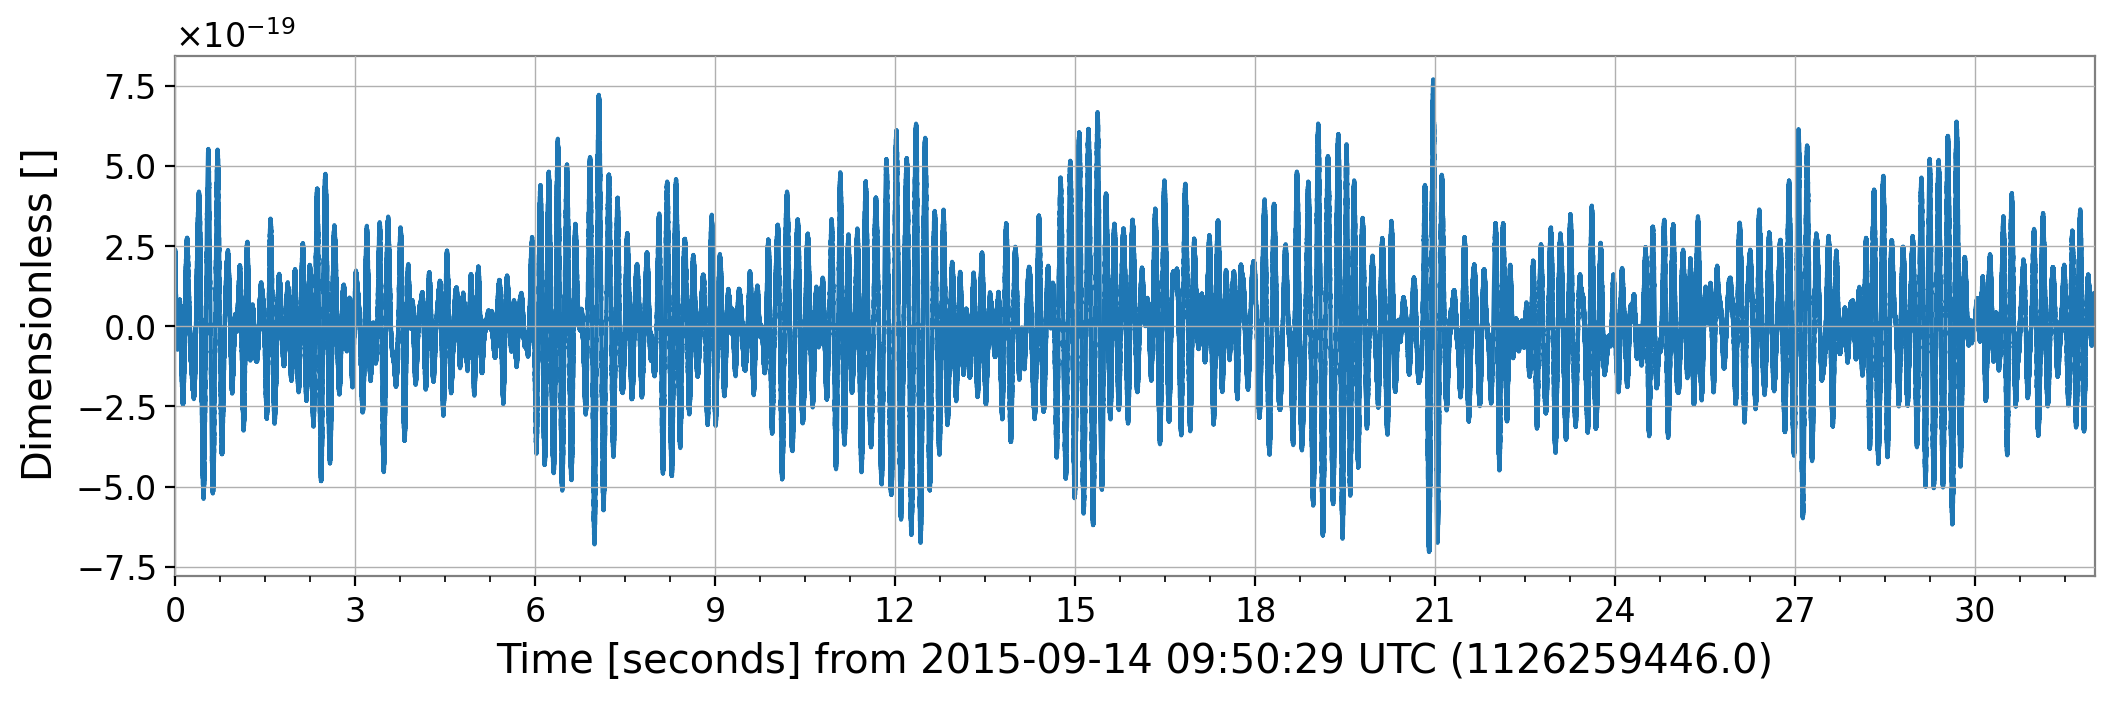

In [ ]:
# -- Read strain data
strain = TimeSeries.read(fn,format='hdf5.gwosc')
center = int(t0)
strain = strain.crop(center-16, center+16)
fig1 = strain.plot()
plt.show()

**Read files imported from google drive and create graph.**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/newsfpplus.csv')
df.head()

,Time,CCAP,RPD,RPD Alias,MeasuredTxOutputPwr,MeasuredRxInputPwr
0,1725459573000,OCLARPCC03,001848096af3,3NKJ2_3NKJ3_2X2,"{""tags"": {""rpd"": ""001848096af3"", ""ccap"": ""UNKN...","{""tags"": {""rpd"": ""001848096af3"", ""ccap"": ""UNKN..."
1,1725459573000,MCTYRPCC05,0018480965a7,4AEV2,"{""tags"": {""rpd"": ""0018480965a7"", ""ccap"": ""MCTY...","{""tags"": {""rpd"": ""0018480965a7"", ""ccap"": ""MCTY..."
2,1725459573000,CV1XRPCC12,0018480af2fb,7BER3,"{""tags"": {""rpd"": ""0018480af2fb"", ""ccap"": ""UNKN...","{""tags"": {""rpd"": ""0018480af2fb"", ""ccap"": ""UNKN..."
3,1725459573000,OCLARPCC03,00184809535d,3NKJ1,"{""tags"": {""rpd"": ""00184809535d"", ""ccap"": ""UNKN...","{""tags"": {""rpd"": ""00184809535d"", ""ccap"": ""UNKN..."
4,1725459573000,GONZRPCC01,001848096809,4PMW3_4PMW4_2X2,"{""tags"": {""rpd"": ""001848096809"", ""ccap"": ""GONZ...","{""tags"": {""rpd"": ""001848096809"", ""ccap"": ""GONZ..."


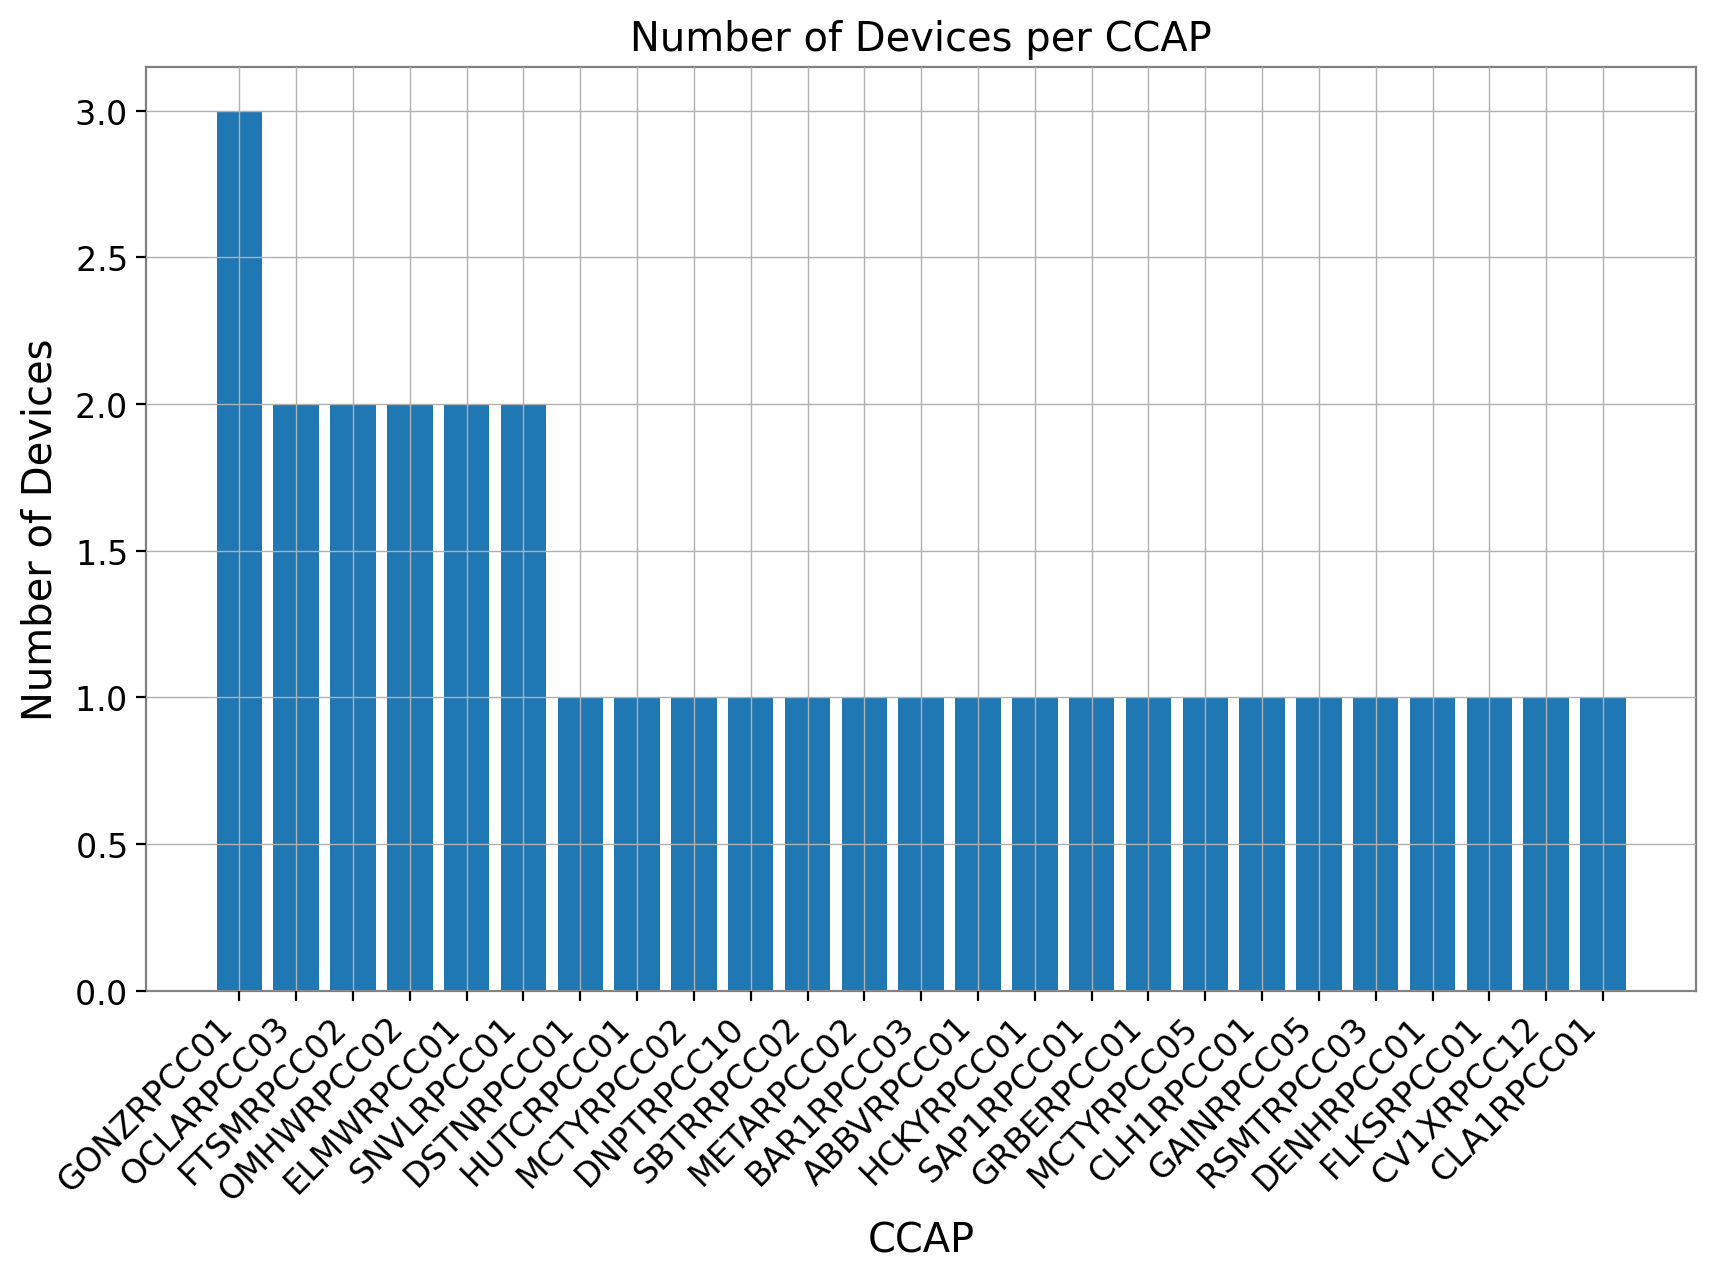

In [ ]:
# @title Number of Devices per CCAP

import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'df'

plt.figure(figsize=(10, 6))
plt.bar(df['CCAP'].value_counts().index, df['CCAP'].value_counts().values)
plt.xlabel('CCAP')
plt.ylabel('Number of Devices')
plt.title('Number of Devices per CCAP')
_ = plt.xticks(rotation=45, ha='right')

In [ ]:
pip install Pydrive2

In [ ]:
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive

**Successfully Authenticated**

In [ ]:
#@title Form Example

text ='value' #@param
date_input = '2018-03-25' #@param {type:"date"}
number_input = 10 #@param {type:"number"}
number_slider = 5 #@param {type:"slider", min:-1, max:10}
dropdown = '1st option' #@param ["1st option", "2nd option", "3rd option"]

**How to get libraries**

In [ ]:
!pip freeze

absl-py==1.4.0
accelerate==0.33.0
aiohappyeyeballs==2.4.0
aiohttp==3.10.5
aiosignal==1.3.1
alabaster==0.7.16
albucore==0.0.14
albumentations==1.4.14
altair==4.2.2
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.18.0
asn1crypto==1.5.1
astropy==6.0.0
astropy-iers-data==0.2024.8.27.10.28.29
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==24.2.0
audioread==3.0.1
autograd==1.7.0
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bidict==0.23.1
bigframes==1.15.0
bigquery-magics==0.2.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.4.3
bqplot==0.12.43
branca==0.7.2
build==1.2.1
CacheControl==0.14.0
cachetools==5.5.0
catalogue==2.0.10
certifi==2024.8.30
cffi==1.17.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.86
clarabel==0.9.0
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpathlib==0.19.0
cloudpickle==2.2.1
cmake==3.30.2
cmdstanpy==1.2.4
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5

In [ ]:
# activage R magic
%load_ext rpy2.ipython

In [ ]:
%%R
x <- 42
print(x)


[1] 42


In [ ]:
import re
from IPython.display import HTML
from IPython.core.magic import register_cell_magic
from IPython.display import Javascript

In [ ]:
def var_sub(m):
    v = globals()[m.group(1)]
    if type(v) != str:
        v = str(v)
    return v

In [ ]:
@register_cell_magic
def javascript(line="", cell=""):
  # var sub
  cell = re.sub(r'\{\{(\w+)+}}', var_sub, cell)

  m = re.match(r'\w+', line)
  if m:
    globals()[m[0]] = cell

  else:
    display(HTML("""
    <div id="drawing"></div>
    <script src="https://cdnjs.cloudflare.com/ajax/libs/svg.js/2.6.5/ s\"
    </script>
    var draw = SVG('drawing').size('100%', 100)
    var y_cursor_pos = 0
    function print(x){
      draw.text(x.toString()).move(400, y_cursor_pos)
      y_cursor_pos += 20
      max = Math.max
    }
    """ + cell))


In [ ]:
%%javascript
draw.rect(100, 100)

Installed Conda 3 Environment

In [ ]:
!wget -c https://repo.continuum.io/archive/Anaconda3-2024.06-1-Linux-x86_64.sh
!chmod +x Anaconda3-2024.06-1-Linux-x86_64.sh
!bash ./Anaconda3-2024.06-1-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.10/site-packages/')
# change to another channel or package
!conda install -y -c pytorch pytorch
!conda install -y -c pytorch torchvision
!conda install -y -c pytorch tor


--2024-09-09 00:49:21--  https://repo.continuum.io/archive/Anaconda3-2024.06-1-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.176.84, 104.18.177.84, 2606:4700::6812:b054, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.176.84|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/archive/Anaconda3-2024.06-1-Linux-x86_64.sh [following]
--2024-09-09 00:49:22--  https://repo.anaconda.com/archive/Anaconda3-2024.06-1-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1056829859 (1008M) [application/octet-stream]
Saving to: ‘Anaconda3-2024.06-1-Linux-x86_64.sh’

Anaconda3-2024.06-1 100%[===================>]   1008M   114MB/s    in 11s     

2024-09-09 00:49:33 (89.9 MB/s) - ‘Ana